## Description

This script is used to generate the figure in the dissertation which gives an example of the SST of each product for the same day, 13 April 2009.

Input files are:
1. OSTIA SST L4, `21652_ostia_sst.nc`
2. CCI SST L4, `21652_cci_sst.nc`
3. CCI SST L3, `ESA_CCI_L3U_AATSR_20090413.nc`
4. CCI SST L2, `ESA_CCI_L2P_AVHRRMTA_G_20090413.nc`

In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy import spatial
import xarray as xr

/home/harry/miniconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [5]:
cci_l4 = xr.open_dataset('../Data/Product_examples/21652_cci_sst.nc')

ostia_l4 = xr.open_dataset('../Data/Product_examples/21652_ostia_sst.nc')

cci_l3 = xr.open_dataset('../Data/Product_examples/ESA_CCI_L3U_AATSR_20090413.nc')

cci_l2 = xr.open_dataset('../Data/Product_examples/ESA_CCI_L2P_AVHRRMTA_G_20090413.nc')

# l2_list = glob.glob('../Data/TSST/ESA_CCI_L2P_AVHRRMTA_G_200903*.nc')
# l3_list = glob.glob('../Data/TSST/ESA_CCI_L3U_AATSR_200812*.nc')

In [6]:
cci_l3

<xarray.Dataset>
Dimensions:             (num_observations: 1348755)
Dimensions without coordinates: num_observations
Data variables:
    latitude            (num_observations) float32 ...
    longitude           (num_observations) float32 ...
    along_track_SST     (num_observations) float32 ...
    standard_deviation  (num_observations) float32 ...
    hour                (num_observations) float32 ...
    minute              (num_observations) float32 ...
    second              (num_observations) float32 ...
Attributes:
    title:         Processed along-track ESA CCI L3U SST data from AATSR for ...
    source:        ESA CCI SST http://data.ceda.ac.uk/neodc/esacci/sst
    references:    https://github.com/sanAkel/Harry_uCapeTown/tree/master/ESA...
    date_created:  Year 2020

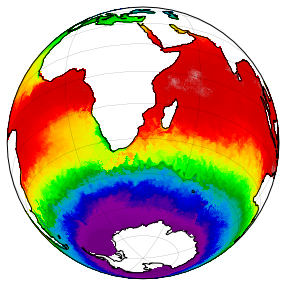

<Figure size 432x288 with 0 Axes>

In [16]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.pcolormesh(cci_l4['lon'], cci_l4['lat'], cci_l4['analysed_sst'][0], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'))
ax.set_title('')
# plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [32]:
print(cci_l4['analysed_sst'][0].min()-273.15)
print(cci_l4['analysed_sst'][0].max()-273.15)

<xarray.DataArray 'analysed_sst' ()>
array(-3.519995)
Coordinates:
    time     datetime64[ns] 2009-04-13T12:00:00
<xarray.DataArray 'analysed_sst' ()>
array(31.959985)
Coordinates:
    time     datetime64[ns] 2009-04-13T12:00:00


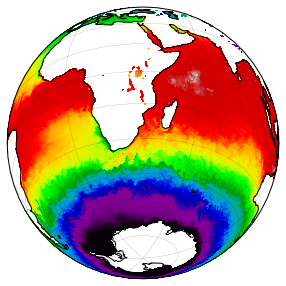

<Figure size 432x288 with 0 Axes>

In [17]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.pcolormesh(ostia_l4['lon'], ostia_l4['lat'], ostia_l4['analysed_sst'][0], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'))
ax.set_title('')
# plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [33]:
print(ostia_l4['analysed_sst'][0].min()-273.15)
print(ostia_l4['analysed_sst'][0].max()-273.15)

<xarray.DataArray 'analysed_sst' ()>
array(-2.000006)
Coordinates:
    time     datetime64[ns] 2009-04-13T12:00:00
<xarray.DataArray 'analysed_sst' ()>
array(31.989984)
Coordinates:
    time     datetime64[ns] 2009-04-13T12:00:00


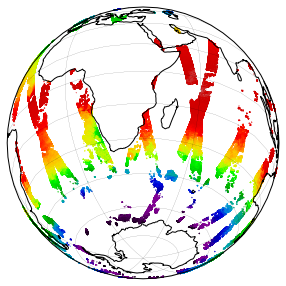

<Figure size 432x288 with 0 Axes>

In [26]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.scatter(cci_l3['longitude'], cci_l3['latitude'], s=0.05, c=cci_l3['along_track_SST'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'))
ax.set_title('')
# plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [35]:
print(cci_l3['along_track_SST'].min()-273.15)
print(cci_l3['along_track_SST'].max()-273.15)

<xarray.DataArray 'along_track_SST' ()>
array(-2.000006)
<xarray.DataArray 'along_track_SST' ()>
array(31.889978)


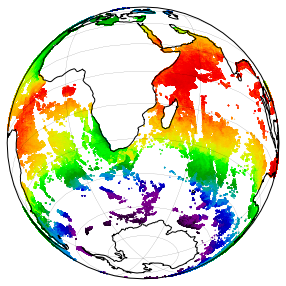

<Figure size 432x288 with 0 Axes>

In [27]:
proj = ccrs.Orthographic(central_latitude=-32,central_longitude=35)

plt.figure(figsize=(8,5))
ax = plt.axes(projection=proj)
# ax.stock_img()
ax.coastlines()
ax.gridlines(color='black', linewidth=0.1)

img = plt.scatter(cci_l2['longitude'], cci_l2['latitude'], s=0.05, c=cci_l2['along_track_SST'], transform=ccrs.PlateCarree(), cmap=plt.get_cmap('nipy_spectral'))
ax.set_title('')
# plt.savefig('../Figures/hycom_nested.png', dpi=300, bbox_inches='tight', format='png')
plt.show()
plt.tight_layout()

In [36]:
print(cci_l2['along_track_SST'].min()-273.15)
print(cci_l2['along_track_SST'].max()-273.15)

<xarray.DataArray 'along_track_SST' ()>
array(-2.000006)
<xarray.DataArray 'along_track_SST' ()>
array(35.429987)


In [25]:
ostia_l4['analysed_sst'].shape

(1, 3600, 7200)